In [ ]:
project_overview = """ 

                        1. Project Overview - Hospital Readmissions Analysis & Prediction (Diabetes Readmissions)
                        

This project is based on the UCI Diabetes 130-US Hospitals Readmission Dataset containing diabetes-specific statistics.

Hospital readmissions are a significant burden on healthcare systems, contributing to added clinical workload, higher costs, and poor patient outcomes.
This project aims to:
    (i) Identify key predictors of 30-day readmissions
    (ii) Build a predictive model to generate actionable insights
    
The final output will produce a decision-support framework for healthcare providers.

"""

In [ ]:
dataset_overview = """

                                                                2. Dataset Overview
                                                                

This dataset provided valuable information regarding patient admissions including the following variables:
- Patient demographics (age)
- Details of hospital stay (length of stay, lab procedures, medications)
- Visit history (inpatient, outpatient, emergency)
- Medical specialty and test specifics (admitted ward, glucose and A1C tests)
- Outcome (if patient was readmitted or not readmiited)

A target variable (readmitted_bin) will be created where 0 = Not readmitted, 1 = Readmitted.


A dataset inspection will be completed to ensure the data set is clean and ready for analysis (as below):

"""

In [ ]:
# Import needed libraries (pandas, numpy, plotly, dash)
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import Dash, html, dash_table, dcc, callback, Output, Input

# Load dataset
df = pd.read_csv(r"C:\Users\nadya\OneDrive\Desktop\Data Analytics\Projects\hospital-readmissions-project\data\raw\hospital_readmissions.csv")

In [ ]:
# Import Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [ ]:
# Overview of data
print("Columns in dataset:", df.columns)
print(df.head())

Columns in dataset: Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')
       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Othe

In [ ]:
# Clean data

# Check for spaces in colums - remove if found
df.columns = df.columns.str.strip()

# Convert columns to numeric value
numeric_cols = ["time_in_hospital", "n_lab_procedures", "n_procedures", "n_medications", "n_outpatient", "n_inpatient", "n_emergency"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

# Convert string reponses to uppercase
df["readmitted"] = df["readmitted"].str.upper()
df["diabetes_med"] = df["diabetes_med"].str.strip().str.upper()

# Convert readmissions to numeric to prepare for ML (NO -> 0, YES -> 1)
df["readmitted_bin"] = df["readmitted"].apply(lambda x: 0 if str(x).upper() == "NO" else 1)


# Check for missing data - replace with mean values
df.fillna(df.mean(numeric_only = True), inplace = True)

# Calculate KPIs
kpi_avg_hospital_time = df["time_in_hospital"].mean()
kpi_avg_lab = df["n_lab_procedures"].mean()
kpi_avg_medications = df["n_medications"].mean()
kpi_readmission_rate = (df["readmitted"] != "NO").mean() * 100
kpi_diabetes_med_patients = (df["diabetes_med"] == "YES").sum()

print("KPI Overview:")
print("Readmission Rate: ", round(kpi_readmission_rate, 1), "%")
print("Average Length of Hospital Stay: ", round(kpi_avg_hospital_time, 1), "days")
print("Average Number of Lab Procedures: ", round(kpi_avg_lab, 1))
print("Average Number of Medications: ", round(kpi_avg_medications, 1))
print("Number of Patients of Diabetes Medication: ", kpi_diabetes_med_patients)

KPI Overview:
Readmission Rate:  47.0 %
Average Length of Hospital Stay:  4.5 days
Average Number of Lab Procedures:  43.2
Average Number of Medications:  16.3
Number of Patients of Diabetes Medication:  19228


In [ ]:
data_cleaning_results = """

                                                            3. Data Cleaning
                                                            


The following were completed during the data cleaning process to ensure unbiased estimated and support accurate ML:
- Column names were verified and the first few rows were displayed.
- Duplicate data and irrelevant fields were removed.
- Standardised numeric values.
- Standardised string values.
- Converted target variable into a binary label. 
- Calculated mean values for missing data.
- Calculated KPIs.
- Removed potential data leaks.
- Missing lab tests were treated as 'not performed'.
- Missing categorical data was labelled 'Unknown'.



Findings from the data clean include:
- Readmission rates were high - at 47%
    Almost half of all patients return to hospital within 30 days - this may indicate that the patient cohort is very high-risk, there are issues within
    the hospital's discharge processes, or coding in the data set marks every return as visit as "readmitted" (Further investigation  will be 
    conducted below to correct this/ rule this out).

- Average length of inpatient hospital stays was 4.5 days
    This is expected/normal. No further investigation will be required for this project.

- An average of 43 lab procedures were performed on each patient during their stay
    This may include repeated lab monitoring, especially in cases of diabetic patients. This is consistent with inpatient disease management and does 
    not require further investigation in this project.
    
- Patients took an average of 16 medications
    May reflect multiple comorbidities per single patient. No further investigation is significant for this project.

- 19, 228 patients were taking diabetic medication
    Indicates that most patients in this dataset take diabetic medication - this is expected within a diabetes readmission dataset.
    

These initial findings indicate the following key areas that require further investigation in the Exploratory Data Analysis:
(1) High readmission rate (47%) - Analysis required to determine whether due to data errors, clinical procedure, or if as expected 
(2) Which wards drive the highest rates of readmission?
(3) What are the top risk factors driving readmission?

"""

Readmissions Counts:
readmitted
NO     13246
YES    11754
Name: count, dtype: int64
Readmission rate: 47.02%


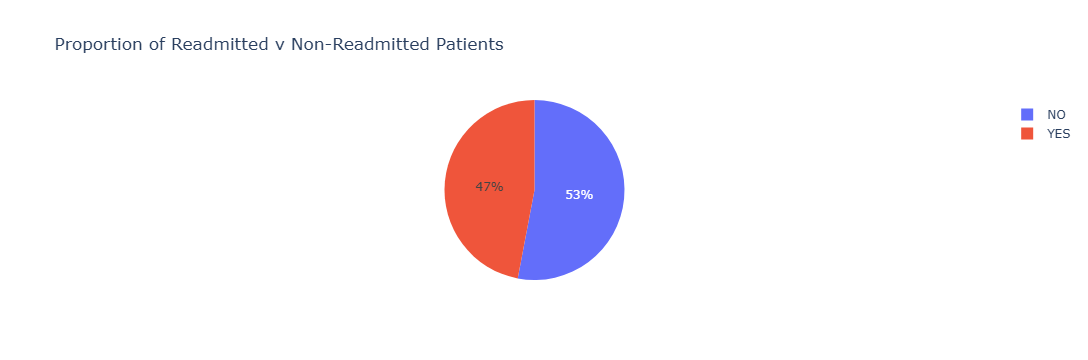

  change diabetes_med readmitted
0     no          YES         NO
1     no          YES         NO
2    yes          YES        YES
3    yes          YES        YES
4     no          YES         NO
readmitted_bin      1.000000
n_inpatient         0.212480
n_outpatient        0.095487
n_emergency         0.093519
time_in_hospital    0.043141
n_medications       0.036871
n_lab_procedures    0.032970
n_procedures       -0.044467
Name: readmitted_bin, dtype: float64


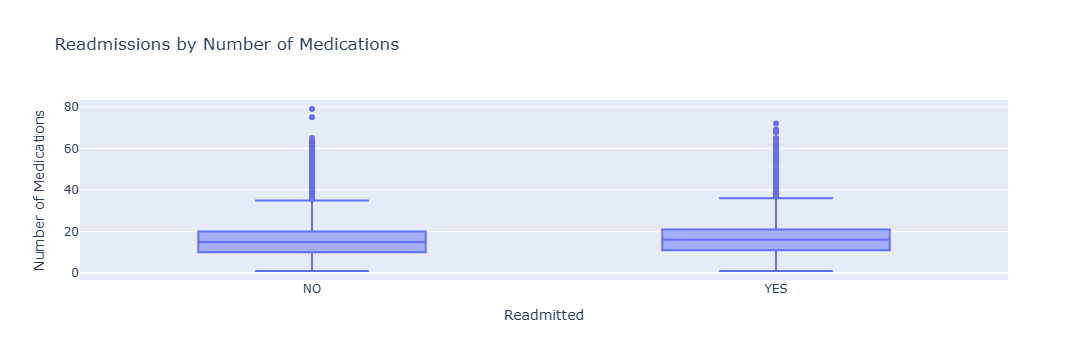

In [ ]:
exploratory_data_analysis1 = """

                                             4. Exploratory Data Analysis (High Readmission Rate)

                        (1) High readmission rate (47 %) - Is this due to data errors, clinical procedure, or is expected?

"""

# Check number of readmissions
readmit_counts = df["readmitted"].value_counts()
print("Readmissions Counts:")
print(readmit_counts)

# Check readmission rate
readmit_rate = df["readmitted_bin"].mean() * 100
print("Readmission rate: {:.2f}%".format(readmit_rate))

# Visualise proportion of readmissions against non-readmissions

# Figure 1
fig1 = px.pie(df, names = "readmitted", title = "Proportion of Readmitted v Non-Readmitted Patients")
fig1.show()

# Check for data leaks (data features and correlations)
future_features = ["change", "diabetes_med", "readmitted"]
print(df[future_features].head())

numeric_features = df.select_dtypes(include = np.number)
correlation_matrix = numeric_features.corr()
print(correlation_matrix["readmitted_bin"].sort_values(ascending = False))

# Figure 2
fig2 = px.box(df, x = "readmitted", y = "n_medications", 
             title = "Readmissions by Number of Medications",
             labels = {"readmitted" : "Readmitted", "n_medications" : "Number of Medications"})
fig2.show()

In [ ]:
exploratory_data_analysis2 = """

                                           4. Exploratory Data Analysis (High Readmission Rate cont...)



The analysis assessed the data for a potential leakage to ensure that the readmission rate is accurate and that predictive modeling is based only
on data at the time of discharge.

The analysis confirmed that numeric variables showed reasonable correlations and no obvious data entry issues were detected, therefore a readmission  
rate of 47% is accurate. Visual and statistical checks support that this dataset is consistent and as expected.

However, a risk of data leakage was observed in categorical data columns 'change' and 'diabetes_med' as the variables may inflate prediction in a 
predictive model. These variables will be excluded from ML.

Figure 2 shows that the median number of medications is similar between both readmitted and not-readmitted cohorts, suggesting that medication counts 
are consistent and reliable, and that no further analysis as a contributing factor is required.


"""

Top wards by readmission rate:
        medical_specialty  readmission_rate
2  Family/GeneralPractice          0.495218
1        Emergency/Trauma          0.493899
4                 Missing          0.489097
0              Cardiology          0.449965
3        InternalMedicine          0.447686
5                   Other          0.414790
6                 Surgery          0.412201


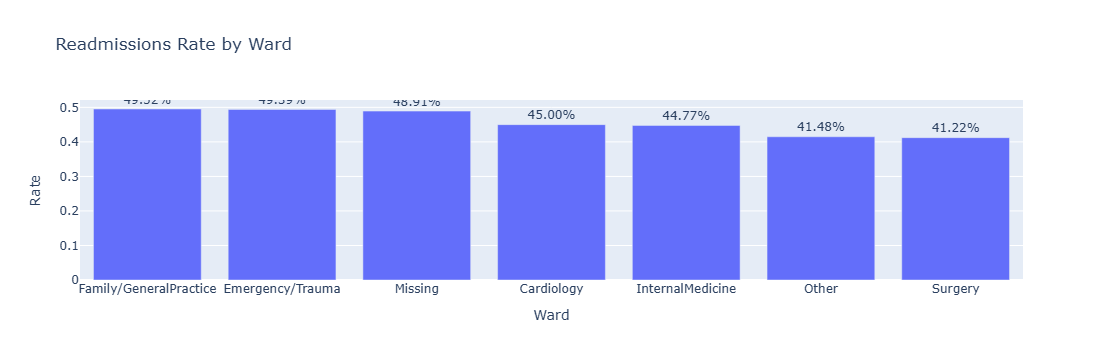

In [ ]:
exploratory_data_analysis3 = """

                                           4. Exploratory Data Analysis (Wards Driving Readmissions)

                                            (2) Which wards drive the highest rates of readmission?

"""

# Group patients by ward and calculate readmission rate
ward_readmissions = df.groupby("medical_specialty")["readmitted_bin"].mean().reset_index()
ward_readmissions.rename(columns = {"readmitted_bin" : "readmission_rate"}, inplace = True)
ward_readmissions.sort_values("readmission_rate", ascending = False, inplace = True)

# Sort wards according to risk of readmission
print("Top wards by readmission rate:")
print(ward_readmissions.head(10))


# Figure 3
fig3 = px.bar(ward_readmissions, x = "medical_specialty", y = "readmission_rate",
             title = "Readmissions Rate by Ward",
             labels = {"medical_specialty" : "Ward", "readmission_rate" : "Rate"},
             text = ward_readmissions["readmission_rate"].apply(lambda x: "{:.2%}".format(x)))
fig3.update_traces(textposition = "outside")
fig3.show()


In [ ]:
exploratory_data_analysis4 = """

                                          4. Exploratory Data Analysis (Wards Driving Readmissions cont...)



Figure 3 displays substantial variation in readmission rates depending on the ward:
    - Family and General Practice displayed the highest readmission rate (49.5%) - suggests that patients admitted to this ward require more complex
      follow-up care plans or have poorly managed chronic conditions.

    - Emergency and Trauma displayed a similarly high readmission rate (49.4%).

    - Missing ward data indicates a large portion of patient readmissions (48.9%) in which were not assigned to a specific ward. This highlights a 
      potential data quality issue.

Ward-level variation suggests that readmission risk is not uniform. This analysis directly informs operational decisions (e.g. where to target 
interventions in discharge planning, patient education, or follow-up procedures).

"""                          

Correlation between factor and readmission:
readmitted_bin      1.000000
n_inpatient         0.212480
n_outpatient        0.095487
n_emergency         0.093519
time_in_hospital    0.043141
n_medications       0.036871
n_lab_procedures    0.032970
n_procedures       -0.044467
Name: readmitted_bin, dtype: float64
Top 5 risk factors:
n_inpatient         0.212480
n_outpatient        0.095487
n_emergency         0.093519
time_in_hospital    0.043141
n_medications       0.036871
Name: readmitted_bin, dtype: float64


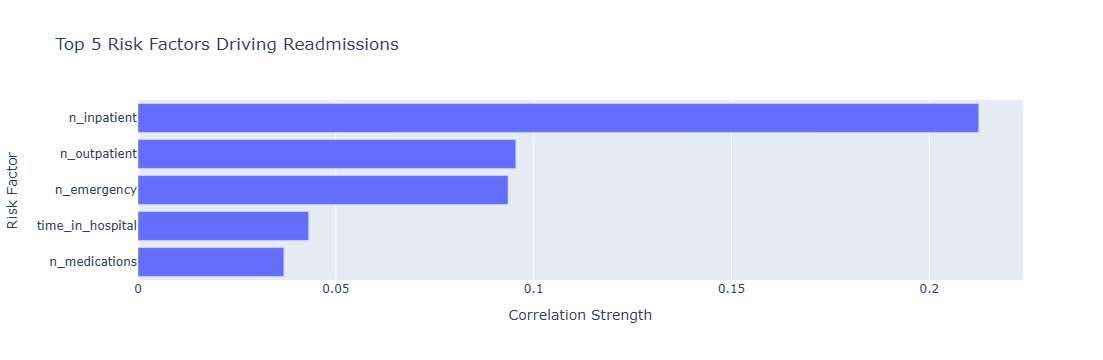

In [ ]:
exploratory_data_analysis5 = """

                                              4. Exploratory Data Analysis (Top Risk Factors)

                                          (3) What are the top risk factors driving readmission?

"""

# Determine correlation between factor and readmission risk
numeric_features = df.select_dtypes(include = np.number)
risk_corr = (numeric_features.corr()["readmitted_bin"].sort_values(ascending = False))

print("Correlation between factor and readmission:")
print(risk_corr)

# Display top 5 risk factors
top5_risk = risk_corr[1:6]
print("Top 5 risk factors:")
print(top5_risk)

top5_df = top5_risk.reset_index()
top5_df.columns = ["feature", "correlation"]

# Figure 4
fig4 = px.bar(top5_df[::-1], x = "correlation", y = "feature", orientation = "h",
             title = "Top 5 Risk Factors Driving Readmissions",
             labels = {"correlation" : "Correlation Strength", "feature" : "Risk Factor"},)
fig4.show()

In [ ]:
exploratory_data_analysis6 = """

                                         4. Exploratory Data Analysis (Top Risk Factors cont...)




The correlation analysis revealed that previous inpatient stays are the strongest predictor of hospital readmission (r = 0.21). These patients often
have unstable chronic conditions, insufficient discharge planning, or inadequate follow-up care. Actionable strategies to prevent this demographic's 
readmission would include (i) Enhanced discharge planning, (ii) GP follow-up within 7 days of discharge,  (iii) Case management/ long-term care 
coordination.


Patients who were repeat outpatients or visited the emergency department also demonstrated higher readmission probabilities (0.095 and 0.094
respectively). These patterns suggest increased utilisation of healthcare services is an early indicator of worsening health conditions and a need for 
ongoing management of a complex chronic condition. Suggested actionable strategies may include (i) Development of community nursing/ chronic disease 
programs, (ii) Establish an "ED frequent visitor" flag within patient databases.


This analysis that high healthcare utilisation patterns are the strongest drivers of readmission - not treatment actions or patient demographics. 
The key predictors: frequent prior admissisons, multiple outpatient/ED visits, longer stays, intensive clinical monitoring may be beneficial in 
developing an early-warning system.

"""


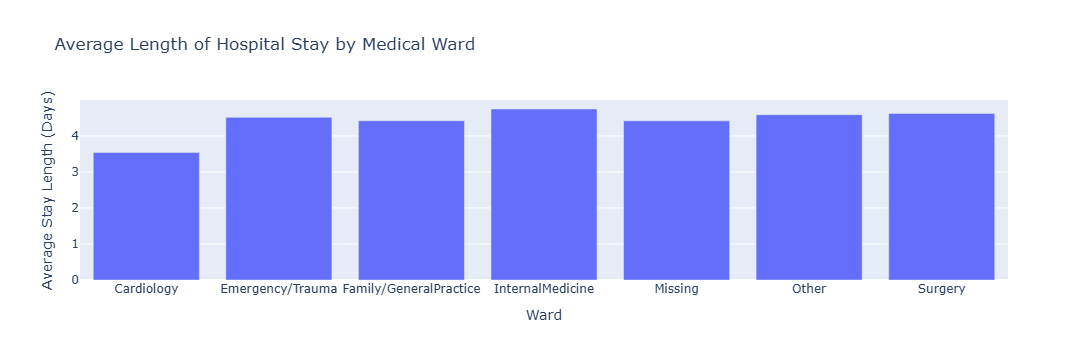

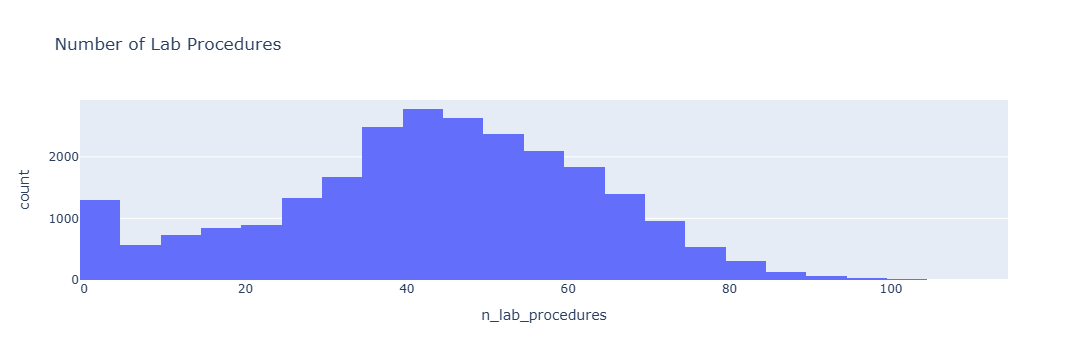

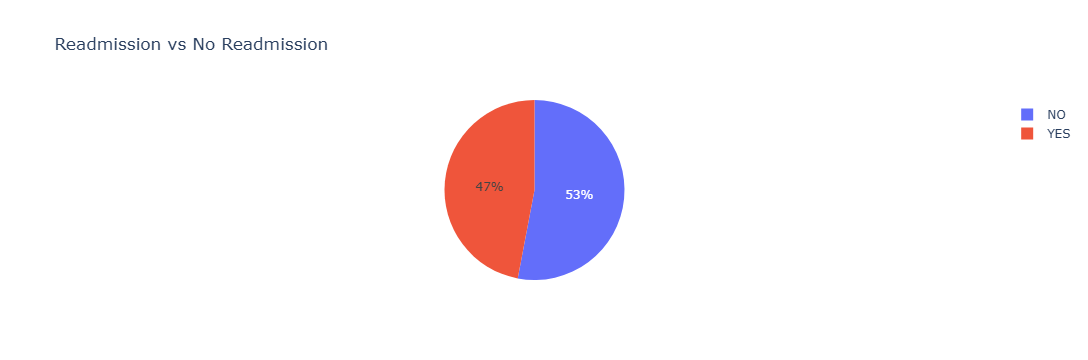

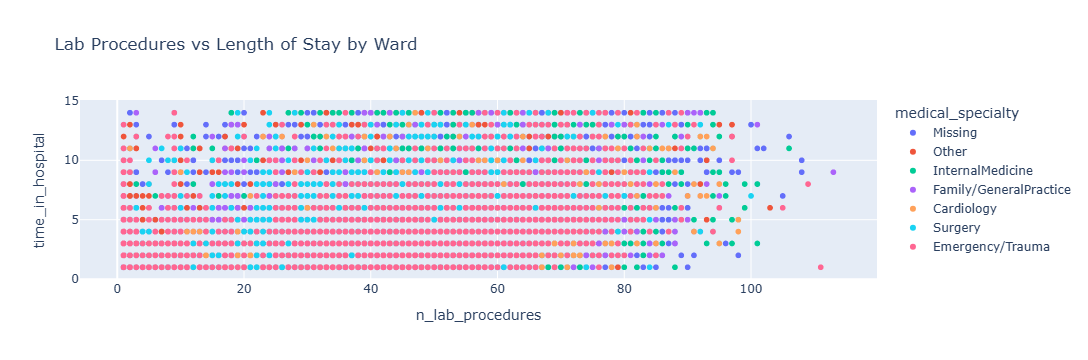

In [ ]:
data_visualisation1 = """

                                                         5. Data Visualisation

"""


# Figure 5 - Avg length of stay (by medical ward)
avg_time_specialty = df.groupby("medical_specialty")["time_in_hospital"].mean().reset_index()
fig5 = px.bar(avg_time_specialty, x = "medical_specialty", y = "time_in_hospital", 
              title = "Average Length of Hospital Stay by Medical Ward",
              labels = {"time_in_hospital" : "Average Stay Length (Days)", "medical_specialty" : "Ward"})
fig5.show()

# Figure 6  - Number of lab procedures
fig6 = px.histogram(df, x = "n_lab_procedures", nbins = 30, 
                    title = "Number of Lab Procedures")
fig6.show()

# Figure 7 - Readmission counts vs Not Readmitted counts
readmit_counts = df["readmitted"].value_counts().reset_index()
readmit_counts.columns = ["readmitted", "count"]
fig7 = px.pie(readmit_counts, values = "count", names = "readmitted", 
              title = "Readmission vs No Readmission")
fig7.show()

# Figure 8 - Number of Lab Procedures vs Length of Stay
fig8 = px.scatter(df, x = "n_lab_procedures", y = "time_in_hospital",
                  color = "medical_specialty", hover_data = ["age", "diag_1"],
                  title = "Lab Procedures vs Length of Stay by Ward")
fig8.show()

# Figure 9 - Patient Count by Ward
ward_counts = df["medical_specialty"].value_counts().reset_index()
ward_counts.columns = ["ward", "count"]
fig9 = px.bar(ward_counts, x = "ward", y = "count",
              title = "Patient Count by Medical Ward",
              labels = {"ward" : "Ward", "count" : "Patient Count"})
fig9.show()


# Figure 10 - Age Distribution in Patient Counts
age_counts = df["age"].value_counts().sort_index().reset_index()
age_counts.columns = ["age","patient_count"]
fig10 = px.bar(age_counts, x = "age", y = "patient_count", 
                       title = "Age Distribution of Patients",
                       labels = {"age": "Age Group", "patient_count": "Patient Count"},
                       color = "patient_count", color_continuous_scale = px.colors.sequential.Teal)
fig10.show()


# Figure 11 - Ward vs Readmission Rate Heatmap
ward_inpatient_heatmap = df.pivot_table(
    index = "medical_specialty",
    columns = "n_inpatient",
    values = "readmitted_bin",
    aggfunc = "mean")
fig11= px.imshow(ward_inpatient_heatmap,
                        labels = dict(x = "Number of Prior Inpatient Visits", y = "Ward", 
                        color = "Readmission Rate"),
                        title = "Readmission Rate by Ward and Prior Inpatient Visits")
fig11.show()

In [ ]:
data_visualisation2 = """

                                                     5. Data Visualisation (cont...)

The average hospital stay duration was compared accross different wards (Figure 5). While most wards display similar stay lengths (4-5 days), 
Emergency/Trauma and Internal Medicine reflect higher averages - this may be reflective of varying case complexity.

Figure 6 displays a smooth, bell-shaped distribution with no extreme outliers of lab procedures per patient indicating diagnostic intensity is 
relatively consistent across all cohorts (thereby, further analysis is insignificant in this project). In Figure 8, a positive trend between
the number of lab procedures and length of stay by ward is evident (patients who have longer stays generally undergo more lab procedures).
This would align with clinical expectations.

A notable portion of patient records fall under 'Missing' ward, indicating poor documentation (Figure 9), this impacts distribution and is thereby
a significant limitation in contextualisisng readmission patterns.

The largest demographic of patients are aged between 70-80 (Figure 10 and 11). This is essential in understanding the age profile 
of at-risk cohorts, indicating older age groups typically experience higher readmission rates.

"""

Model Evaluation:
Accuracy: 0.608
ROC AUC: 0.641
              precision    recall  f1-score   support

           0       0.60      0.79      0.68      2658
           1       0.63      0.40      0.49      2342

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.58      5000
weighted avg       0.61      0.61      0.59      5000

Key risk factors driving Readmissions:
                      feature      coef  abs_coef
23                n_inpatient  0.385562  0.385562
18             A1Ctest_normal -0.254646  0.254646
5                age_[90-100) -0.244818  0.244818
12  medical_specialty_Surgery -0.240746  0.240746
24                n_emergency  0.239652  0.239652
11    medical_specialty_Other -0.206149  0.206149
0                 age_[40-50) -0.170730  0.170730
14            glucose_test_no -0.148734  0.148734
1                 age_[50-60) -0.129114  0.129114
13          glucose_test_high -0.122943  0.122943


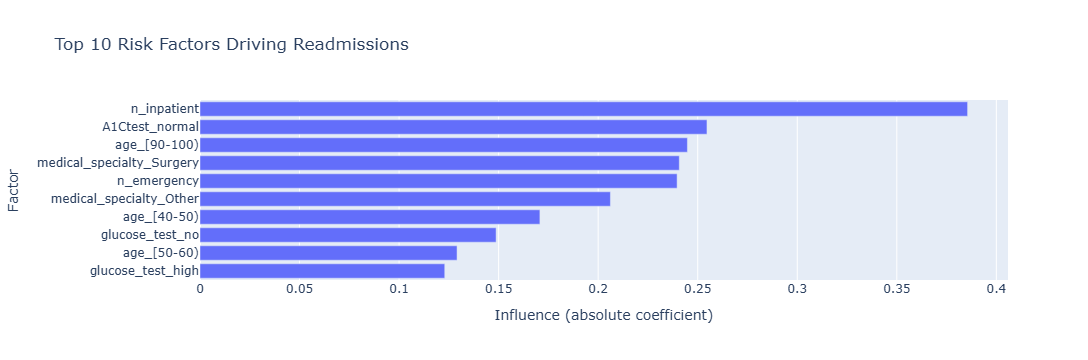

Top 3 factors considered for improvement:  ['n_inpatient', 'A1Ctest_normal', 'age_[90-100)']
Predicted baseline readmission probability:  0.471
Predicted simulated probability:  0.427
Estimated improvement:  4.43 % reduction in readmissions


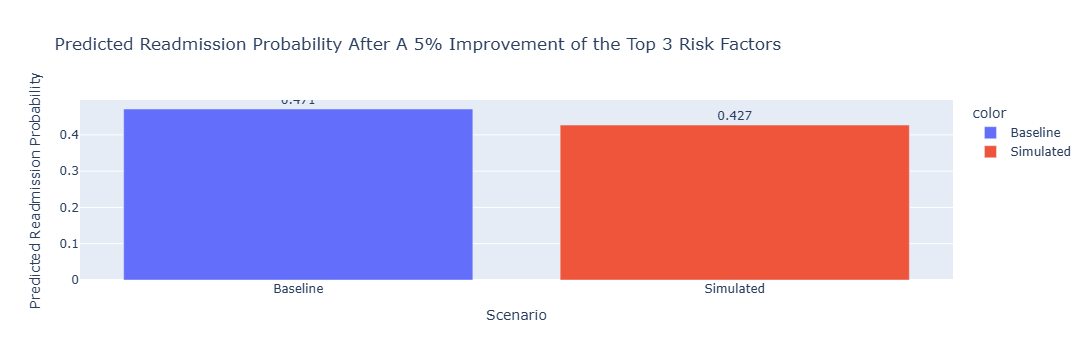

In [ ]:
machine_learning1 = """

                                                     6. Machine Learning Model

"""

# Select columns used in the model
features = ["age", "time_in_hospital", "n_lab_procedures", "n_medications", "n_outpatient", "n_inpatient", "n_emergency", "medical_specialty", "glucose_test", "A1Ctest"]
X = df[features]
y = df["readmitted_bin"]

# Sort by numeric / categorical for preprocessing
categorical = ["age", "medical_specialty", "glucose_test", "A1Ctest"]
numeric = [col for col in X.columns if col not in categorical]

# Preprocessing - for ML suitability
preprocess = ColumnTransformer([("cat", OneHotEncoder(handle_unknown = "ignore"), categorical), ("num", "passthrough", numeric)])

# Pipeline with logistic regression to train the model
model = Pipeline([("preprocess", preprocess), ("logreg", LogisticRegression(max_iter = 1000))])

# Split the data into train/ test - (learn patterns/ evaluate model). Train model, give predictions, evaluate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model.fit(X_train, y_train)

pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:,1]

print("Model Evaluation:")
print("Accuracy:", round(accuracy_score(y_test, pred), 3))
print("ROC AUC:", round(roc_auc_score(y_test, proba), 3))
print(classification_report(y_test, pred))

# Identify key risk factors driving readmissions (top 10)
logreg = model.named_steps["logreg"]
encoded_cat = list(model.named_steps["preprocess"].named_transformers_["cat"].get_feature_names_out(categorical))
feature_names = encoded_cat + numeric

importances = pd.DataFrame({"feature": feature_names, "coef": logreg.coef_[0]})
importances["abs_coef"] = importances["coef"].abs()
importances.sort_values("abs_coef", ascending = False, inplace = True)

print("Key risk factors driving Readmissions:")
print(importances.head(10))

# Figure 12 (Bar chart) - Highlight key risk factors (top 10 most influential)
top10_features = importances.head(10)
fig_top10 = px.bar(top10_features[::-1], x = "abs_coef", y = "feature", orientation = "h", 
                   title = " Top 10 Risk Factors Driving Readmissions",
                   labels = {"abs_coef": "Influence (absolute coefficient)", "feature": "Factor"})
fig_top10.show()

# Simulate a 5% improvement of the most influential risk factors to estimate decrease in readmissions (top 3 factors)
top_n = 3
top_features = importances.head(top_n)

baseline_pred = proba.mean()

combined_effect = sum(0.05 * abs(top_features["coef"]))
simulated_pred = baseline_pred - combined_effect
improvement = (baseline_pred - simulated_pred) * 100

print("Top 3 factors considered for improvement: ", list(top_features["feature"]))
print("Predicted baseline readmission probability: ", round(baseline_pred,3))
print("Predicted simulated probability: ", round(simulated_pred, 3))
print("Estimated improvement: ", round(improvement, 2), "% reduction in readmissions")

# Figure 13 (Bar chart) - Estimate decrease in readmission from a 5% improvement of the top 3 key risk factors
fig13 = px.bar(x = ["Baseline", "Simulated"], y = [baseline_pred, simulated_pred], text = [round(baseline_pred,3), round(simulated_pred, 3)],
              title = "Predicted Readmission Probability After A 5% Improvement of the Top 3 Risk Factors",
              labels = {"x": "Scenario", "y" : "Predicted Readmission Probability"},
              color = ["Baseline", "Simulated"])
fig13.update_traces(textposition = "outside")
fig13.show()

# Create new dataframe with the top 3 risk predictors
top3_features = pd.DataFrame({"feature": ["n_inpatient", "A1Ctest_normal", "age_[90-100)"],
                             "coef": [0.385562, - 0.254646, -0.244818],
                             "abs_coef": [0.385562, 0.254646, 0.244818]})

fig14 = px.bar(top3_features[::-1], x = "abs_coef", y = "feature", orientation = "h",
        text = "coef",
        title = "Top 3 Predictors Driving Readmissions",
        labels = {"abs_coef": "Impact on Readmission Rate (coefficient)", "feature": "Predictor"},
        color = "coef")
fig14.update_traces(texttemplate = "%{text:.3f}", textposition = "outside")
fig14.show()


# Plot coefficients - show positive (driving) and negative (protective) effects

fig15 = px.bar(top3_features[::-1], x = "feature", y = "coef", text = "coef",
              title = "Driving/Protective Effect on Readmission Risk",
              labels = {"coef": "Coefficient", "feature": "Predictor"},
              color = "coef")

fig15.update_traces(texttemplate = "%{text:.3f}", textposition = "outside")
fig15.show()


# Plot distribution of age cohorts against vulnerability
age_readmission = df.groupby("age")["readmitted_bin"].mean().reset_index()
age_readmission.rename(columns = {"readmitted_bin": "readmission_rate"}, inplace=True)
age_readmission["readmission_rate_pct"] = age_readmission["readmission_rate"] * 100

fig16 = px.bar(
    age_readmission, x = "age", y = "readmission_rate_pct", text = "readmission_rate_pct",
    title = "Readmission Rate by Age Group",
    labels = {"age": "Age Group", "readmission_rate_pct": "Readmission Rate (%)"},
    color = "readmission_rate_pct",
    color_continuous_scale=px.colors.sequential.Blues)

fig16.update_traces(texttemplate = '%{text:.2f}%', textposition = 'outside')
fig16.show()

In [ ]:
machine_learning2 = """

                                                     6. Machine Learning Model (cont...)


                                                     

Machine Learning Model - Predicting 30-Day Hospital Readmissions
    A Machine Learning Model was developed to predict the likelihood of patient readmission within 30 days. Logistic Regression was selected due to its
    interpretability and suitability for generating actionable insights.



Feature Selection:
    Categorical variables were One-Hot Encoded and numerical values were passed through (unchanged). Preprocessing was bundled within the model to 
    prevent data leakage and maintain consistent handling of the training and test data.

    The features 'readmitted', 'change', and 'diabetes_med' were excluded to prevent data leakage.

    The target variable was the binary readmitted flag (where 0 = not readmitted, 1 = readmitted).



Data Preprocessing & Pipeline Contruction:
    Pre-processing was from only the training set, ensuring that performance metrics (ROC and AUC, and accuracy) were not inflated.
    Numeric values were passed through unchanged, while Categorical values were One-Hot Encoded.



Model Training & Evaluation:
    An 80/20 train-test split evaluated out-of-sample performance. 

    The model achieved:
    ROC AUC: 0.641
    Accuracy: 0.608
    Recall of Class 0 (not readmitted): 0.79
    Recall of Class 1 (readmitted): 0.40

    This reveals the model is accurate in identifying patients who are not at risk of being readmitted but it is less sensitive to patients who are,
    highlighting that improved recall for Class 1 is required.


    
Key Risk Identification:
    Logistic regression coefficients were ranked in order of highest readmission risk. The top 3 most significant predictors were: 
    1. n_inpatient (coef = +0.386)
        Patients with higher prior inpatient visits are significantly more likely to be readmitted.
    2. A1Ctest_normal (coef = -0.255)
        Normal A1C results are a protective factor in reducing readmission risk.
    3. age_[90-100) (coef = -0.245)
        There is a lower risk of readmission within this age cohort, likely due to specialised monitoring or low intensity treatment approaches.

    These insights highlight where clinical interventions may be targeted.



ML simulated 5% Improvement:
    A simulation was performed where a hypothetical 5% improvement was applied to the top 3 predictors (n_inpatient, A1Ctest_normal, and age_[90-100]). 

    The model estimated a 4.73% reduction in readmission probability (from 0.471 to 0.427).

    There was an overall accuracy of 0.608 and ROC AUC of 0.641.
    The model can identify non-readmissions with a recall of 0.79 however, it was less sensitive in detecting readmissions with a recall of 0.40. This
    suggests that while the model is reliable, improvement in capturing high-risk patients is required.

    The key predictors of readmission  included:
    1. n_inpatient: coef = 0.386 (very strong predictor) 
        Patients with a higher number of inpatient visits are significantly more likely to be readmitted.
        
    2. A1Ctest_normal: coef = -0.255 (strong negative factor) 
        Patients with normal A1C test results have a reduced readmission risk.
        
    3. age_[90-100): coef = -0.245 (negative factor) 
        Patients aged between 90-100 are less likely to be readmitted, likely due to more established monitoring or lower intensity interventions

    This establishes that even modest improvements may produce meaningful reductions.

"""  

In [ ]:
limitations_and_next_steps = """

                                                     7. Limitations and Next Steps

Interpretation of Findings:
    This analysis highlightse several clinical and operational patterns associated with hospital readmissions (for diabetic patients). Readmission rates 
    vary accross wards - where Emergency/Trauma and General Practice show the highest occurrences. This is likely reflective of a difference in case
    complexity, patient comorbidity files, and continuity of care. The exploratory findings further indicate previous inpatient visits and healthcare
    utilisation are stronger drivers of readmission than treatment intensity.

Limitations:
   Despite producing clinically useful findings, this analysis has several limitations:
   1. Limited predictivity
       The model's recall for readmitted patients is low therefore, many readmissions are not counted. Variables such as length of stay and number of 
       inpatient stays are useful in predicting risk but not sufficient for a thorough model.

    2. Missing/ Incomplete Data
        A large portion of patient ward records fall under "Missing", reducing the model's ability to learn patterns from clinical data.

    3. Model Choice
        A simple baseline classifier was used due to its interpretability. However, these types of models are not as accurate when dealing with
        non-linear data relationships.

Next Steps:
    The following recommended steps would improve accuracy and generate more significant insights:
    1. Feature Engineering
        Creation of flags for high-risk medication groups that may influence readmissions (e.g. anticoagulants, insulin). Incorporate additional
        important variables such as time since last admission, lab testing trends, procedures per day, medication dosages/intensity.

    2. Improve Model
        Apply class imbalance strategies.
        Utilise more advanced Machine-Learning Models (e.g. Random Forest).

    3. Patient Subgroup Validation
        Clinical patterns may vary significantly throughout wards - perform ward-specific models to evaluate fairness across age and ward cohorts.

Key Stakeholder Takeaways:
    Hospital Administrators
        - Readmission risk is concentrated in a few high-volume wards (Emergency/Trauma and Internal Medicine) thereby, targeted interventions could yield
          significantly reduced outcomes.

        - Prior inpatient visits are the strongest risk predictor - these patients should be prioritised for ongoing/ transitional care programs.

        - Length of stay is not a significant risk factor - efforts should focus on maintaining patient stability rather than shortening duration of stay.

    Clinical Teams
        - Existing dataset variables fail to predict many readmissions, there is a requirement for deeper clinical detail and consistency in 
          documentation (specifically in listing wards).

    Data & Analytics Teams
        - Opportunity for predictive improvement through feature engineering and modern ML approaches.
        - Address missing ward data and enhancement on clinical detail.

"""